In [1]:
# numerical and data manipulation libraries
import numpy as np
import pandas as pd

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# evaluation metrics and class balancing
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# deep learning frameworks
import keras
import tensorflow as tf

# image preprocessing tools
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import save_model

# model architecture and training utilities
from tensorflow.keras.models import Sequential, load_model, save_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
import os

In [3]:
# dataset paths
base_dir = 'chest_xray'
train_path = os.path.join(base_dir, 'train')
test_path = os.path.join(base_dir, 'test')
valid_path = os.path.join(base_dir, 'val')

# define standard parameter values
batch_size = 32
img_height = 150
img_width = 150


In [4]:
# data augmentation for training images
image_gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# rescaling for validation and test images (no augmentation)
test_data_gen = ImageDataGenerator(rescale=1./255)

In [5]:
 #lload and preprocess training images with augmentation
train = image_gen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    class_mode='binary',
    batch_size=batch_size
)

# load and preprocess test images (no augmentation, no shuffle)
test = test_data_gen.flow_from_directory(
    test_path,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    shuffle=False,
    class_mode='binary',
    batch_size=batch_size
)

# load and preprocess validation images (no augmentation)
valid = test_data_gen.flow_from_directory(
    valid_path,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    class_mode='binary',
    batch_size=batch_size
)

Found 4192 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 1040 images belonging to 2 classes.


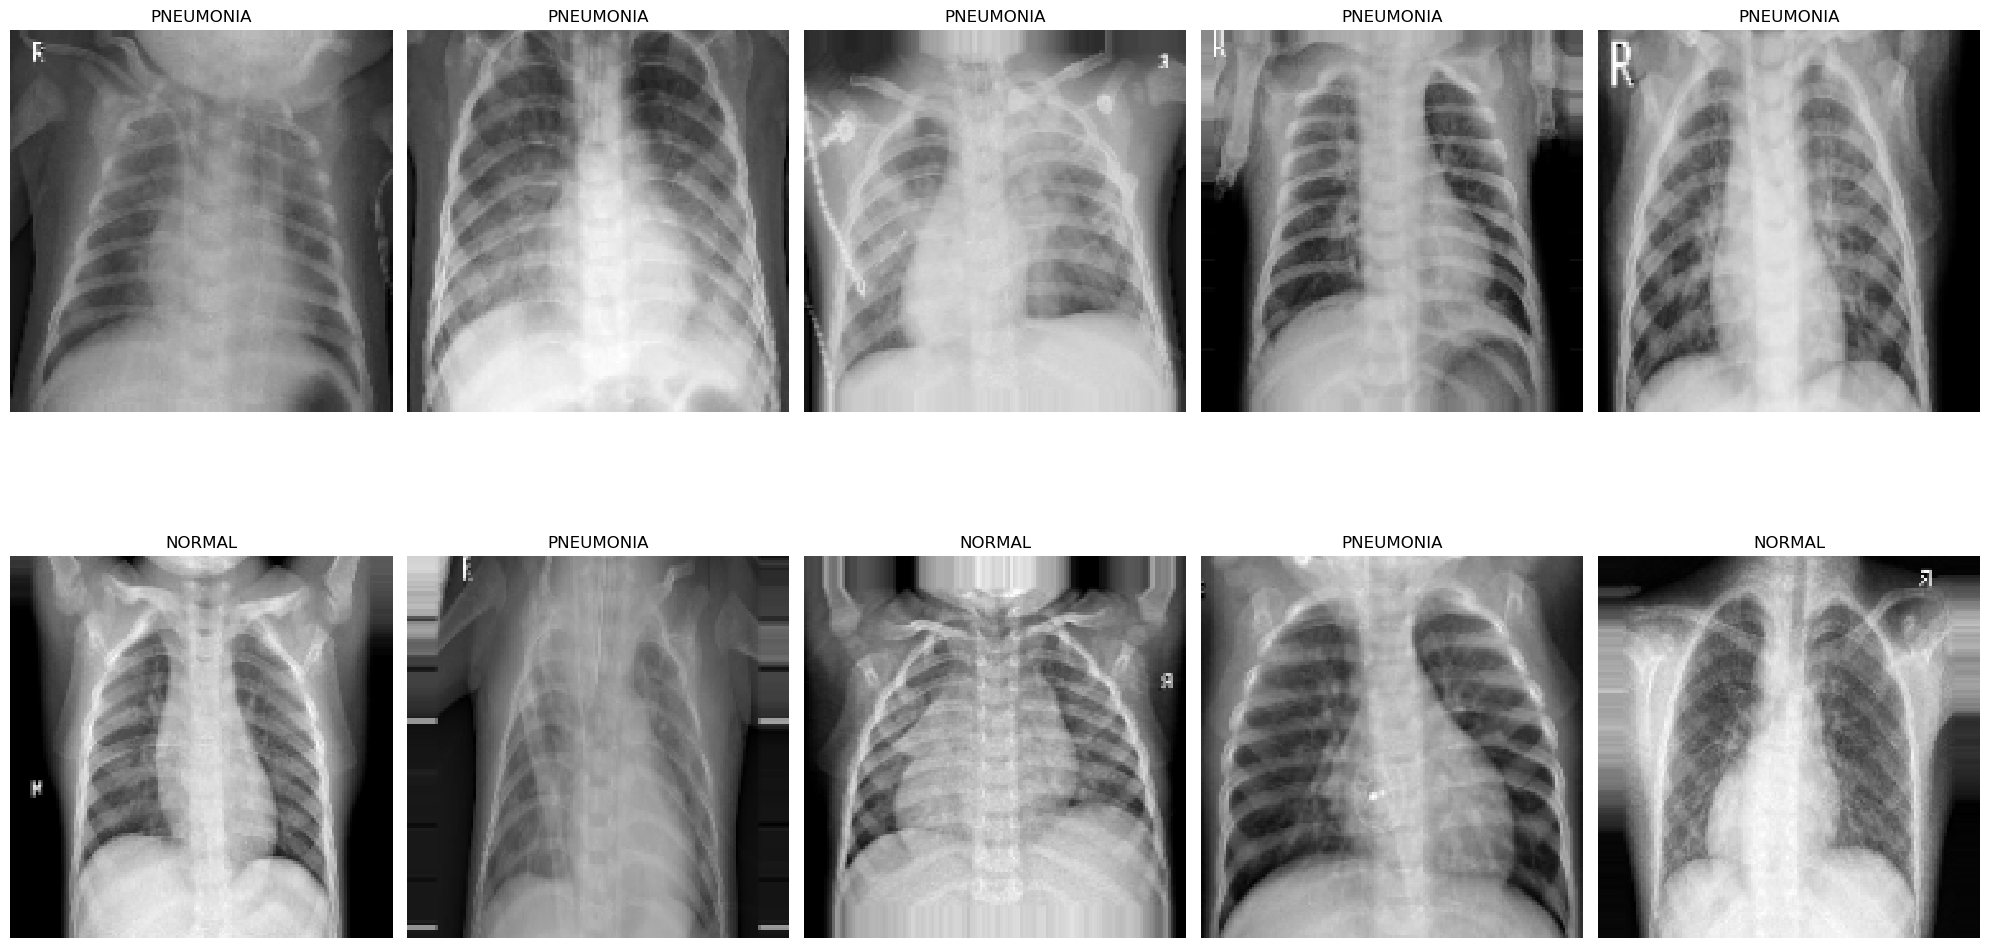

In [6]:
# display sample images from the training set with labels

plt.figure(figsize=(20, 12))  # define the overall figure size

for i in range(0, 10):
    plt.subplot(2, 5, i+1)  # create a 2x5 grid of subplots

    for X_batch, Y_batch in train:  # fetch one batch from the generator
        image = X_batch[0]          # get the first image in the batch
        label = Y_batch[0]          # get the corresponding label
        label_dict = {0: 'NORMAL', 1: 'PNEUMONIA'}

        plt.title(label_dict.get(label))  # set class name as title
        plt.axis('off')                   # remove axis ticks
        plt.imshow(np.squeeze(image), cmap='gray', interpolation='nearest')  # display grayscale image
        break  # display only one image per iteration

plt.tight_layout()
plt.show()

In [7]:
# define a custom Sequential Convolutional Neural Network (CNN)
model_cnn = Sequential()

# first convolutional layer with 32 filters, 3x3 kernel, ReLU activation
model_cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))  # downsampling

# second convolutional layer with 32 filters
model_cnn.add(Conv2D(32, (3, 3), activation="relu"))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))

# third convolutional layer with 32 filters
model_cnn.add(Conv2D(32, (3, 3), activation="relu"))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))

# fourth convolutional layer with 64 filters
model_cnn.add(Conv2D(64, (3, 3), activation="relu"))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))

# fifth convolutional layer with 64 filters
model_cnn.add(Conv2D(64, (3, 3), activation="relu"))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))

# flatten the output before passing to dense layers
model_cnn.add(Flatten())

# fully connected layer with 128 units
model_cnn.add(Dense(128, activation='relu'))

# fully connected layer with 64 units
model_cnn.add(Dense(64, activation='relu'))

# output layer with sigmoid activation for binary classification
model_cnn.add(Dense(1, activation='sigmoid'))

# compile the model using Adam optimizer and binary cross-entropy loss
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# display the model architecture summary
model_cnn.summary()

c:\Users\UTM\anaconda3\envs\pengolahanCitra\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 5, 5, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115,457 (451.00 KB)

 Trainable params: 115,457 (451.00 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# define early stopping to prevent overfitting by monitoring validation loss
early = EarlyStopping(
    monitor="val_loss",
    mode="min",
    patience=3
)

# reduce learning rate when validation loss plateaus
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_loss',
    patience=2,
    verbose=1,
    factor=0.3,
    min_lr=1e-6
)

# compute class weights to handle imbalanced dataset
weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train.classes),
    y=train.classes
)

# convert weights to dictionary format expected by Keras
cw = dict(zip(np.unique(train.classes), weights))

In [9]:
# train the CNN model
history_cnn = model_cnn.fit(
    train,
    epochs=100,
    validation_data=valid,
    class_weight=cw  # apply class weighting to handle imbalance
    # callbacks=callbacks_list  # optionally include callbacks
)

c:\Users\UTM\anaconda3\envs\pengolahanCitra\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 64s 477ms/step - accuracy: 0.6672 - loss: 0.5044 - val_accuracy: 0.9048 - val_loss: 0.2655
Epoch 2/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 30s 230ms/step - accuracy: 0.8948 - loss: 0.2578 - val_accuracy: 0.8625 - val_loss: 0.3363
Epoch 3/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 30s 230ms/step - accuracy: 0.9034 - loss: 0.2369 - val_accuracy: 0.9192 - val_loss: 0.2223
Epoch 4/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 31s 233ms/step - accuracy: 0.9079 - loss: 0.2292 - val_accuracy: 0.9135 - val_loss: 0.2284
Epoch 5/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 32s 242ms/step - accuracy: 0.9105 - loss: 0.2188 - val_accuracy: 0.9125 - val_loss: 0.2196
Epoch 6/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 30s 229ms/step - accuracy: 0.9258 - loss: 0.2006 - val_accuracy: 0.8885 - val_loss: 0.2715
Epoch 7/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 31s 235ms/step - accuracy: 0.9265 - loss: 0.1872 - val_accuracy: 0.9298 - val_loss: 0.1842
Epoch 8/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 31s 240ms/step - accuracy: 0.9256 -

In [10]:
fp = r"C:\d\uas\cnn_pneu_vamp_model.keras"

import os
os.makedirs(os.path.dirname(fp), exist_ok=True)

model_cnn.save(fp)

In [11]:
# define file path for saving the model in .keras format (recommended for TensorFlow 2.x+)
fp = "cnn_pneu_vamp_model.keras"
model_cnn.save(fp)  # save model in the newer .keras format

# load the saved model from the .keras file
cnn = load_model(fp)

# save the model in HDF5 (.h5) format for compatibility with older tools
model_cnn.save('CNN_Classification_1.h5')

# alternative way to save using save_model() function explicitly
save_model(model_cnn, 'CNN_Classification_2.h5')

In [12]:
preds = cnn.predict(test,verbose=1)

20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 274ms/step


In [13]:
test_accu = cnn.evaluate(test)
print('The testing accuracy is :',test_accu[1]*100, '%')

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 190ms/step - accuracy: 0.9151 - loss: 0.3444
The testing accuracy is : 91.50640964508057 %


In [14]:
# convert predicted probabilities to binary class labels (threshold at 0.5)
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

# reset the test generator so it starts from the beginning
test.reset()

# concatenate all images and true labels from the test generator
x = np.concatenate([test.__next__()[0] for i in range(len(test))])  # all test images
y = np.concatenate([test.__next__()[1] for i in range(len(test))])  # all ground truth labels

# print shapes for confirmation
print(x.shape)  # shape: (num_samples, height, width, channels)
print(y.shape)  # shape: (num_samples,)

(624, 150, 150, 1)
(624,)


In [15]:
# generate a classification report including precision, recall, F1-score, and support for each class
print(classification_report(
    y_true=test.classes,          # true labels from the test set
    y_pred=predictions,           # predicted labels from the model
    target_names=['NORMAL', 'PNEUMONIA']  # human-readable class names
))

              precision    recall  f1-score   support

      NORMAL       0.97      0.80      0.88       234
   PNEUMONIA       0.89      0.98      0.94       390

    accuracy                           0.92       624
   macro avg       0.93      0.89      0.91       624
weighted avg       0.92      0.92      0.91       624



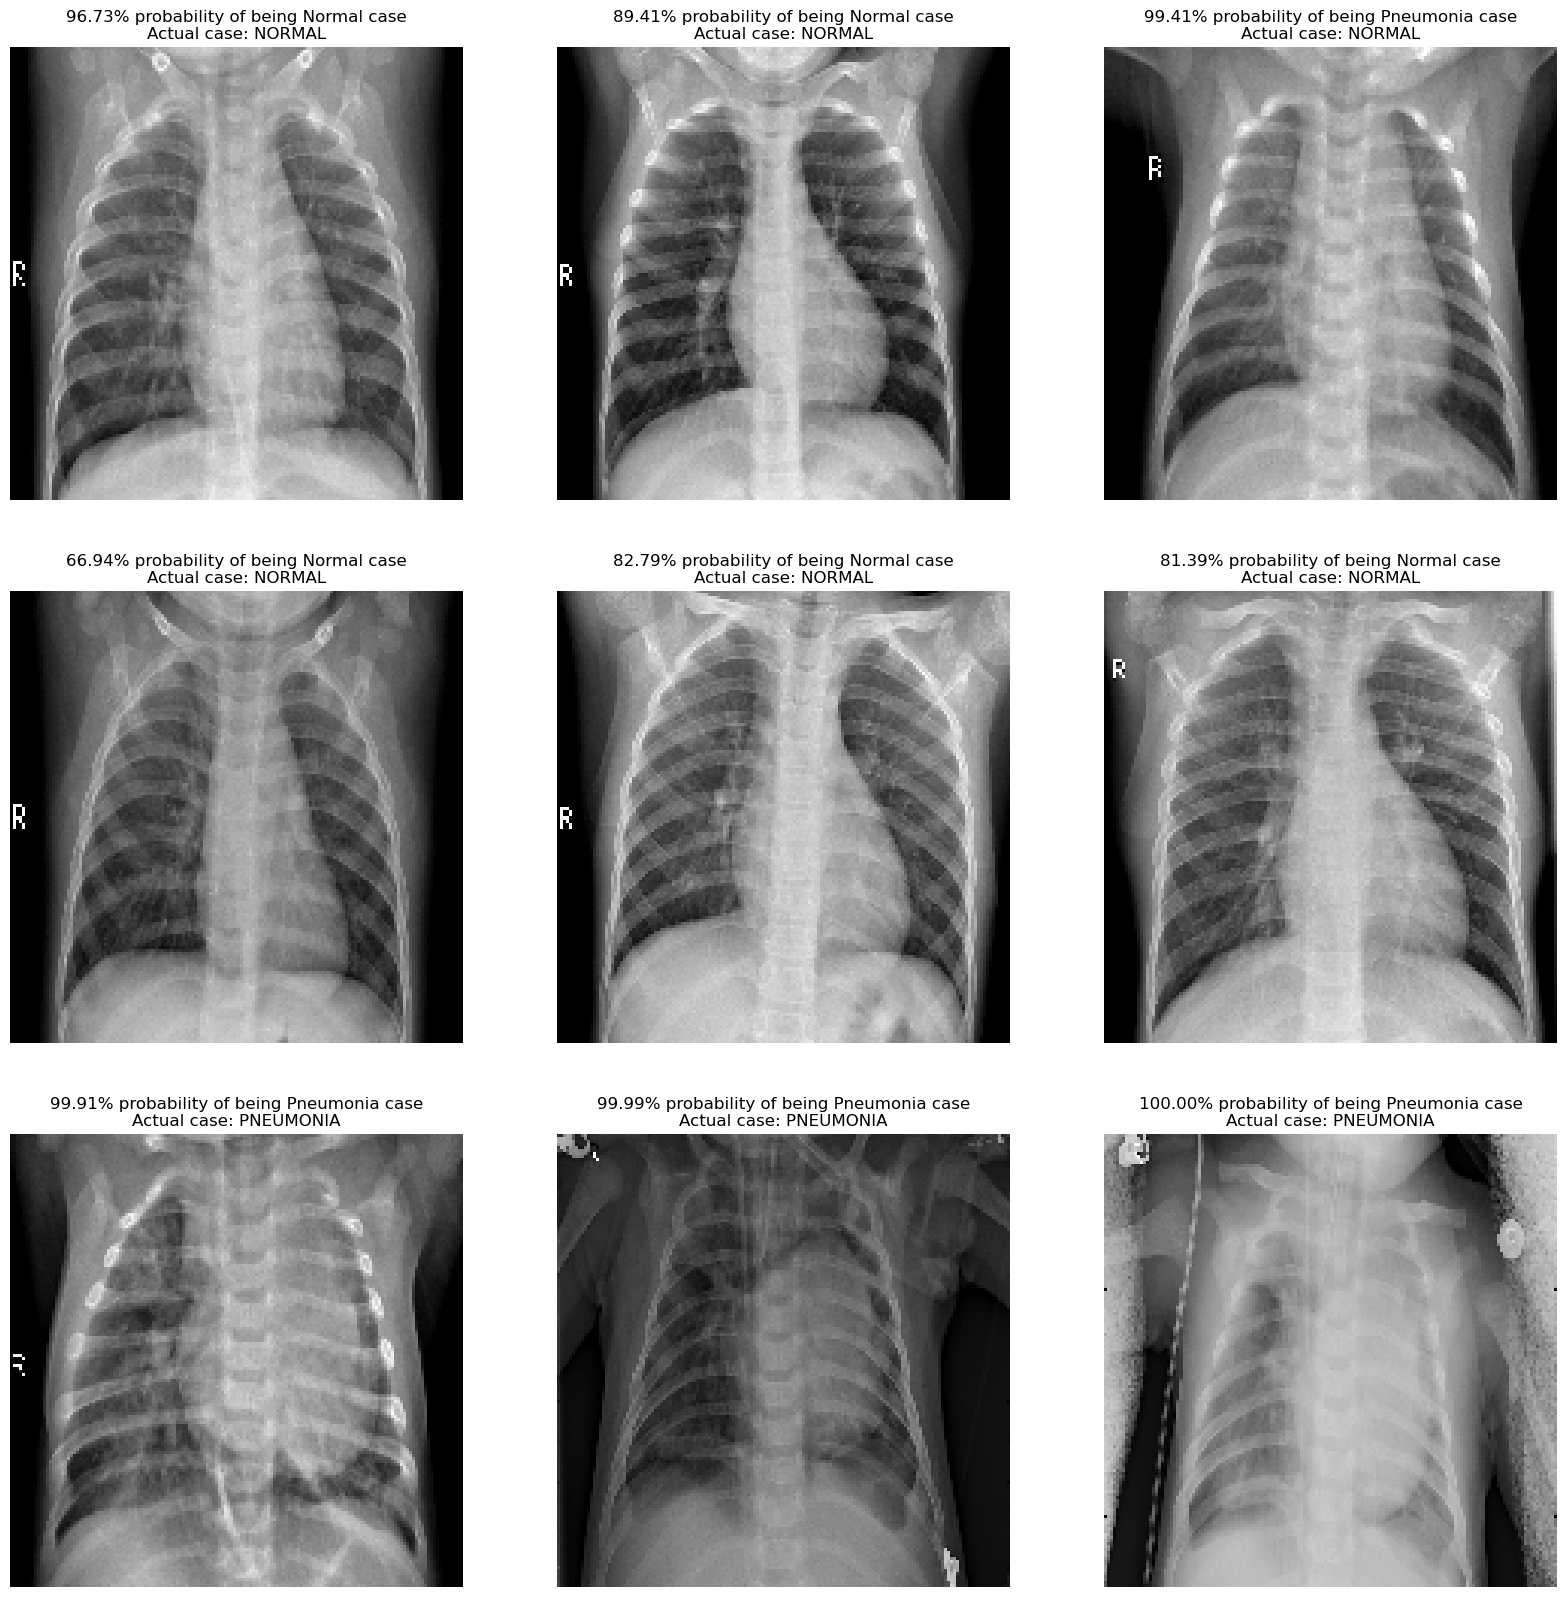

In [16]:
# dictionary to map class labels to readable text
dic = {0: 'NORMAL', 1: 'PNEUMONIA'}

# set up the figure size for displaying images
plt.figure(figsize=(20, 20))

# loop through 9 test images starting from index 228
for i in range(0 + 228, 9 + 228):
    plt.subplot(3, 3, (i - 228) + 1)  # create a 3x3 grid of subplots

    # generate prediction text with probability
    if preds[i, 0] >= 0.5:
        out = '{:.2%} probability of being Pneumonia case'.format(preds[i][0])
    else:
        out = '{:.2%} probability of being Normal case'.format(1 - preds[i][0])

    # set the title with predicted probability and actual class label
    plt.title(out + "\nActual case: " + dic.get(y[i]))

    # display the image (remove singleton dimension)
    plt.imshow(np.squeeze(x[i]), cmap='gray')
    plt.axis('off')

# display the full grid
plt.show()
